# <center>Interplolation polynômiale</center>
______________
## Qu'est-ce que l'interpolation?
L'interpolation est le processus d'estimation des valeurs inconnues qui se situent entre des valeurs connues.
__________________
## Qu'est ce que un polynome?
Polynomial est composé de deux termes, à savoir Poly (signifiant «many») et Nomial (signifiant «termes»). Un polynôme est défini comme une expression qui est composée de variables, de constantes et d'exposants, qui sont combinés en utilisant les opérations mathématiques telles que l'addition, la soustraction, la multiplication et la division (aucune opération de division par une variable). Sur la base du nombre de termes présents dans l'expression, il est classé comme monôme, binôme et trinôme
___
>En analyse numérique, l’interpolation polynômiale est une technique d’interpolation d’une fonction par un polynôme. Etant donnés une fonction $f : [a, b] → R $ et N > 1  un entier naturel.<br/>
Soient $x_{0} , x_{1} , · · · , x_{N} (N + 1) $ points (appelés aussi des noeuds) deux à deux distincts dans
[a, b]. Le but est de chercher à trouver un polynôme p (à coefficients réels) vérifiant le système
suivant :
\begin{cases}
f (x_{i} ) = p(x_{i} ) , pour tout i = 0, 1, · · · , N
\\\\ deg(p) \leq N 
\end{cases}.
___
>___Théorème___ : Il existe un unique polynôme p vérifiant le système précedent.
La preuve se base sur le déterminant de Van der Monde.
______________

> ## Partie I : Interpolation lagrangienne
___
 En analyse numérique, les polynômes de Lagrange, du nom de Joseph-Louis Lagrange, permettent d'interpoler une série de points par un polynôme qui passe exactement par ces points appelés aussi nœuds
___
On se donne n + 1 points ${\displaystyle (x_{0},y_{0}),\dots ,(x_{n},y_{n})}$$(x_{0},y_{0}),\dots ,(x_{n},y_{n}) $(avec les xi distincts deux à deux). On se propose de construire un polynôme de degré minimal qui aux abscisses xi prend les valeurs yi, ce que la méthode suivante permet de réaliser.

L'étude suivante propose de montrer que le polynôme $ {\displaystyle L(X)=\sum _{j=0}^{n}y_{j}\left(\prod _{i=0,i\neq j}^{n}{\frac {X-x_{i}}{x_{j}-x_{i}}}\right)}$ ${\displaystyle L(X)=\sum _{j=0}^{n}y_{j}\left(\prod _{i=0,i\neq j}^{n}{\frac {X-x_{i}}{x_{j}-x_{i}}}\right)}$
est le seul polynôme de degré au plus n à satisfaire cette propriété 
___

### Polynômes de Lagrange
es polynômes de Lagrange associés à ces points sont les polynômes définis par :

$${\displaystyle l_{i}(X)=\prod _{j=0,j\neq i}^{n}{\frac {X-x_{j}}{x_{i}-x_{j}}}={\frac {X-x_{0}}{x_{i}-x_{0}}}\cdots {\frac {X-x_{i-1}}{x_{i}-x_{i-1}}}~{\frac {X-x_{i+1}}{x_{i}-x_{i+1}}}\cdots {\frac {X-x_{n}}{x_{i}-x_{n}}}.}{\displaystyle l_{i}(X)=\prod _{j=0,j\neq i}^{n}{\frac {X-x_{j}}{x_{i}-x_{j}}}={\frac {X-x_{0}}{x_{i}-x_{0}}}\cdots {\frac {X-x_{i-1}}{x_{i}-x_{i-1}}}~{\frac {X-x_{i+1}}{x_{i}-x_{i+1}}}\cdots {\frac {X-x_{n}}{x_{i}-x_{n}}}.}$$
On a en particulier deux propriétés :

li est de degré n pour tout i ;
$${\displaystyle l_{i}(x_{j})=\delta _{i,j},0\leq i,j\leq n}l_{i}(x_{j})=\delta _{{i,j}},0\leq i,j\leq n$$ c'est-à-dire $${\displaystyle l_{i}(x_{i})=1}l_{i}(x_{i})=1 et {\displaystyle l_{i}(x_{j})=0}l_{i}(x_{j})=0$$ pour $${\displaystyle j\neq i}j\neq i$$

> ## Creation d'une fonction python qui sert a calculer le Polynômes de Lagrange :

In [1]:
def PR(x,y,c):
    S = []
    n = len(x);
    l=[]
    
    for i in range(len(x)):
        l=[c-xx for xx in x]
        
        for j in range(len(x)):
            if i==j:
                l[j]=1
            else:
                l[j]=l[j]/(x[i]-x[j])
                
        
        S.append(y[i]*np.prod(l))
    return sum(S);


In [2]:
import numpy as np
X=[1,2,3,4];
Y=[-1,0,2,1];
for i in (X):
    print(PR(X,Y,i))


-1.0
0.0
2.0
1.0


Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

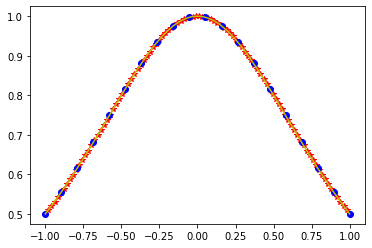

In [3]:
import matplotlib.pyplot as plt
x=np.linspace(-1,1,20)
f=lambda x:1/(1+x**2)
t=np.linspace(-1,1,100)
y=[f(xx) for xx in x]
pt=[]
for u in range (len(t)):
    pt.append(PR(x,y,t[u]))

plt.plot(t,pt,'r*',x,f(x),'bo',t,f(t),'y')
plt.show()

>__le graphe montre qu'il n'y a pas de différence entre la fonction réelle qui est $f(x) = \dfrac{1}{1 + x^2}$  et la fonction que nous avons creer par la methode de Lagrange
ils se ressemblent bien__


3) On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

3.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$.

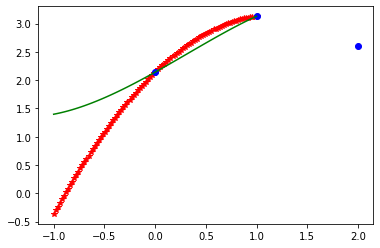

In [4]:
x=np.linspace(0,2,3)
import math
f=lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
t=np.linspace(-1,1,100)
y=[f(xx) for xx in x]
pt=[]
for u in range (len(t)):
    pt.append(PR(x,y,t[u]))
y2=[f(tt) for tt in t]
plt.plot(t,pt,'r*',x,y,'bo',t,y2,'g')
plt.show()

>__les deux courbe (le courbe de F en <span style="color:green">vert</span> et le courbe $p_n$ en <span style="color:red">rouge</span>) sont différentes ,et il exist un erreur__ 

2)Tracer la courbe d'erreur (la fonction $F-p_n$). Qu'observer vous.

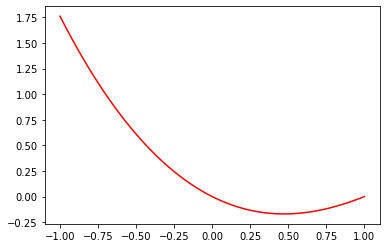

In [5]:
y3=[y2[i]-pt[i] for i in range(len(y2))]
plt.plot(t,y3,'r')
plt.show()

L’erreur d’interpolation lors de l’approximation d’une fonction f de classe $C^{N +1} (]a, b[) $  aux
noeuds $x_{i} pour i = 0, · · · , N $, par p le polynôme de Lagrange, est donnée par : pour tout
x ∈ [a, b], il existe α ∈ (min(x i , x), max(x n , x)) tel que
$$e(x) = f (x) − p(x) =
\frac{f^{N +1} (α)}{(N + 1)!}w(x),
$$
tel que où $w(x) = (x − x 0 )(x − x 1 ) · · · (x − x N ).$

> ## Phénomène de Runge
le phénomène de Runge se manifeste dans le contexte de l'interpolation polynomiale, en particulier l'interpolation de Lagrange. Avec certaines fonctions (même analytiques), l'augmentation du nombre n de points d'interpolation ne constitue pas nécessairement une bonne stratégie d'approximation.

En étudiant cette question, le mathématicien allemand Carl Runge découvrit, en 1901, un résultat contraire à l'intuition : il existe des configurations où l'écart maximal entre la fonction et son interpolation augmente indéfiniment avec n.
_____

### Phenomène de Runge pour $f(x)={\frac{1}{1+x^2}}$ avec N=[7,8,9,10]
-------

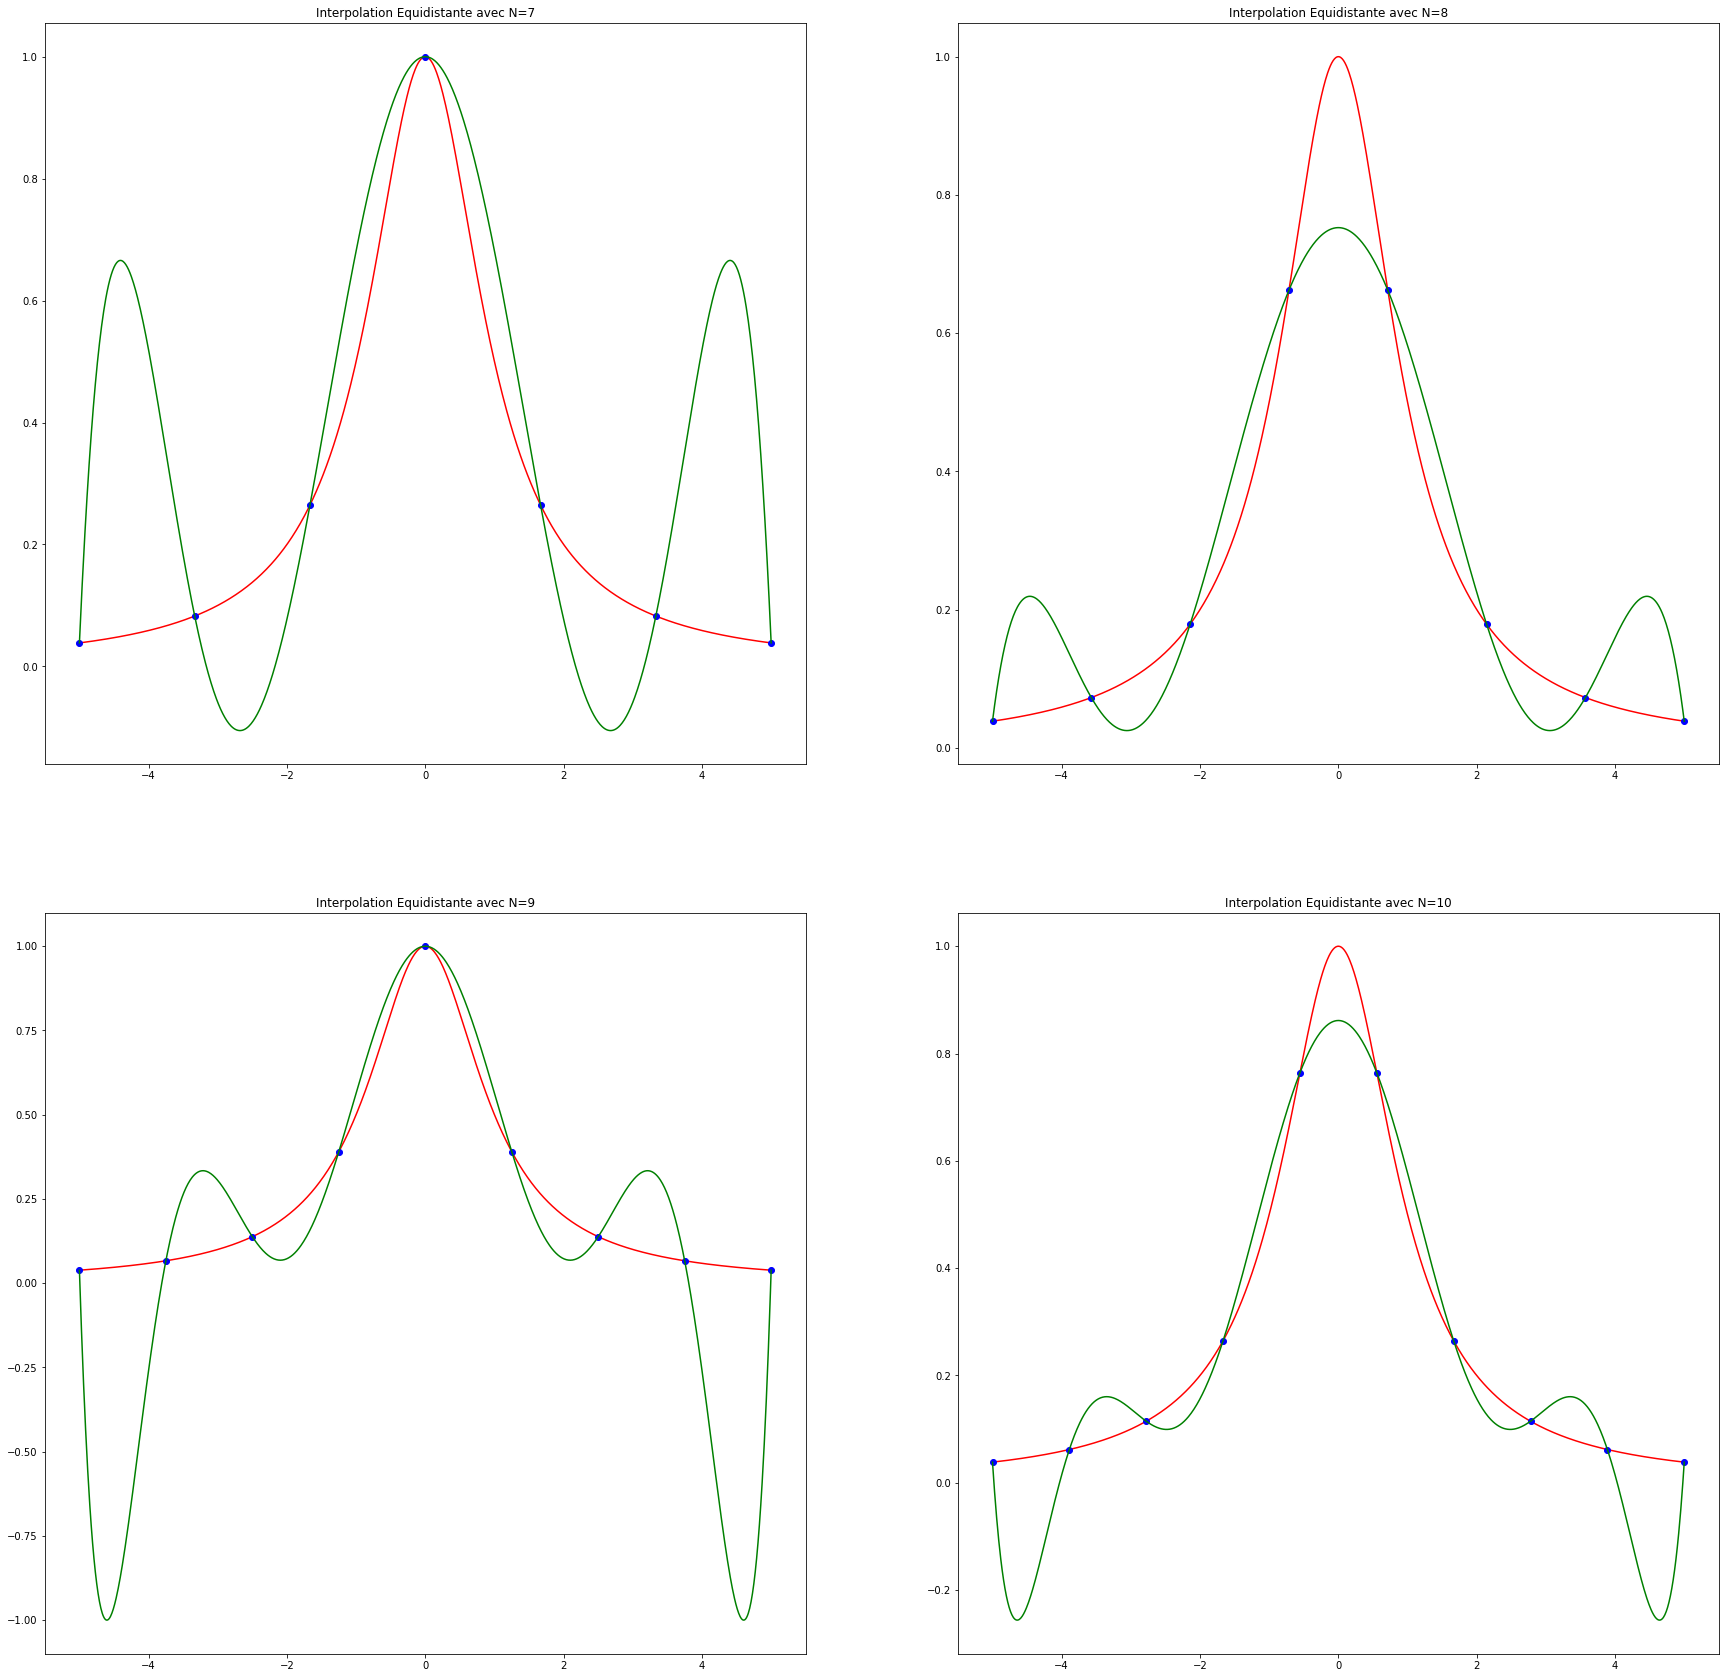

In [6]:
fig = plt.figure(figsize=(30,30))
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1./(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)# polynomial coefficients
t=np.linspace(-5,5,1000)
figure=plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')# polyval polynomial value in the points contained in t
plt.title("Interpolation Equidistante avec N=7")

##############################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1./(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
##############################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1./(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
##############################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1./(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()

On dispose donc d'une fonction f, continue sur un intervalle I, et de N points $x1,…,xN$, où on connait $y_{i}=f(x_{i})$. L'interpolation polynomiale consiste à approcher f par un polynôme P qui vérifie $P(x_{i})=y_{i}=f(x_{i})$ pout tout i=1,…,n. On dit que P interpole f en xi. On démontre qu'il existe exactement un polynôme de degré au plus N−1 qui vérifie cela : c'est le polynôme interpolateur de Lagrange.

En fait, lorsqu'on augmente le nombre de points, on constate que le polynôme se met à osciller fortement entre les points xi avec une amplitude de plus en plus grande, comme l'illustre les figures.

### Tchebycheff
L'un des moyens les plus simples d'obtenir une approximation polynomiale de degré
n à une fonction continue f (x) sur [a, b] consiste à interpoler entre
valeurs de f (x) à n + 1 points distincts convenablement sélectionnés dans l'intervalle. Pour
exemple, pour interpoler à
x1, x2, ..., xn + 1
par le polynôme
pn (x) = c0 + c1x + ··· + cnxn,
nous exigeons que
c0 + c1xk + ··· + cnxn
k = f (xk) (k = 1, ..., n + 1)
_____________
2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

In [7]:
import math
def tcheb(a,b,n):
    return [(a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi) for k in range(1,n+1)]
print(tcheb(-5,5,11))

[-5.0, -4.755282581475767, -4.045084971874737, -2.938926261462366, -1.5450849718747373, -3.061616997868383e-16, 1.5450849718747368, 2.938926261462365, 4.045084971874736, 4.755282581475767, 5.0]


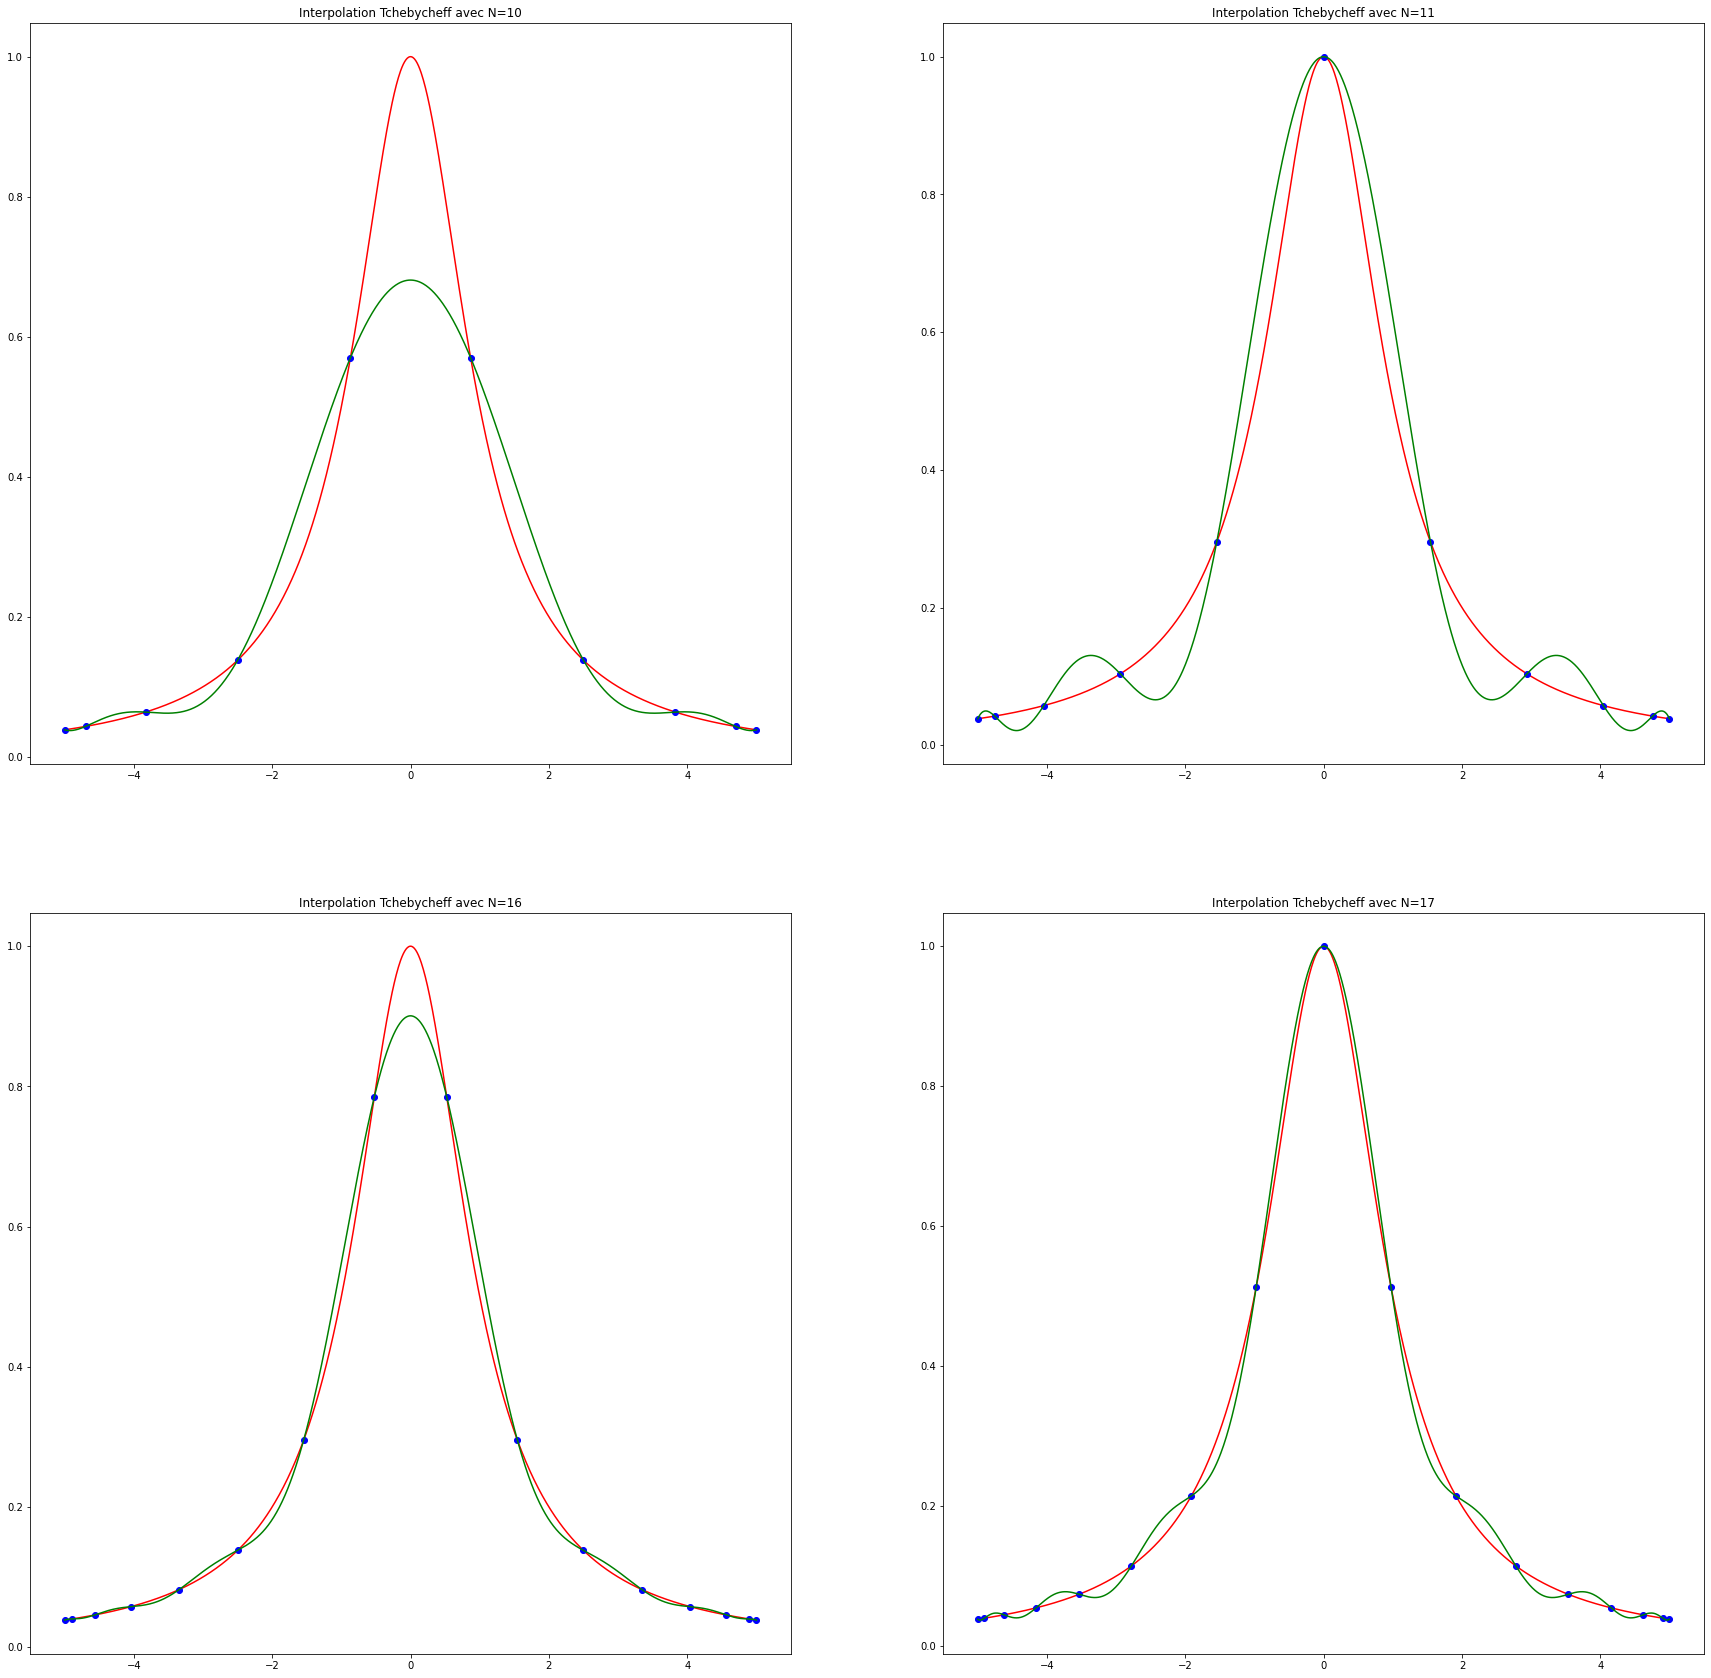

In [8]:
fig = plt.figure(figsize=(30,30))
N=10
t=np.linspace(-5,5,1000)

f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[f(xt) for xt in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
##########################################
N=11
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[f(xt) for xt in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
##########################################
N=16
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[f(xt) for xt in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
##########################################
N=17
f=lambda x: 1/(1+x**2)
Xt=tcheb(-5,5,N)
Yt=[f(xt) for xt in Xt]
pt=np.polyfit(Xt,Yt,N-1)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
plt.show()

Cependant, si l'interpolation au sens de Tchebychev est bien meilleure que l'interpolation aux points équidistants, elle ne résout pas complètement le phénomène de Runge.

## Interpolation newtonienne
l'interpolation newtonienne, du nom d'Isaac Newton, est une méthode d'interpolation polynomiale permettant d'obtenir le polynôme de Lagrange comme combinaison linéaire de polynômes de la « base newtonienne ».
<br/>
Cette méthode ne diffère de l'interpolation lagrangienne que par la façon dont le polynôme est calculé, le polynôme d'interpolation qui en résulte est le même. Pour cette raison on parle aussi plutôt de la forme de Newton du polynôme de Lagrange.
___________________
Étant donnés ${\displaystyle k+1}$ points<br/> 
$
{\displaystyle (x_{0},y_{0}),\ldots ,(x_{k},y_{k})}(x_{0},y_{0}),\ldots ,(x_{k},y_{k})$ (les xj tous distincts 2 à 2), l'interpolation polynomiale dans une base de Newton est une combinaison linéaire de polynômes appartenant à cette base
$${\displaystyle N(x)=\sum _{j=0}^{k}a_{j}n_{j}(x)}{\displaystyle N(x)=\sum _{j=0}^{k}a_{j}n_{j}(x)}$$
avec les polynômes de Newton définis de la manière suivante

$${\displaystyle n_{j}(x)=\prod _{0\leq i<j}(x-x_{i})\qquad j=0,\ldots ,k}$$
(en particulier ${\displaystyle n_{0}=1}{\displaystyle n_{0}=1}$, le produit vide)

et les coefficients égaux aux différences divisées :

$${\displaystyle a_{j}=[y_{0},\ldots ,y_{j}].}$$
En résumé :

Le polynôme d'interpolation de Newton$ {\displaystyle N(x)}$N(x) associé à ${\displaystyle k+1}$ k+1 points
${\displaystyle (x_{0},y_{0}),\ldots ,(x_{k},y_{k})}(x_{0},y_{0}),\ldots ,(x_{k},y_{k})$ est défini par :

$${\displaystyle N(x)=[y_{0}]+[y_{0},y_{1}](x-x_{0})+\ldots +[y_{0},\ldots ,y_{k}](x-x_{0})\ldots (x-x_{k-1}).}$$$${\displaystyle N(x)=[y_{0}]+[y_{0},y_{1}](x-x_{0})+\ldots +[y_{0},\ldots ,y_{k}](x-x_{0})\ldots (x-x_{k-1}).}$$


In [17]:

def intN(x,y):
    m=len(x)
    
    for k in range(1,m):
        y[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return y

In [18]:
x=[-1,0,2,5]
y=[6,1,3,66]
print(intN(x,y))


[6, -5.0, 2.0, 0.3333333333333333]


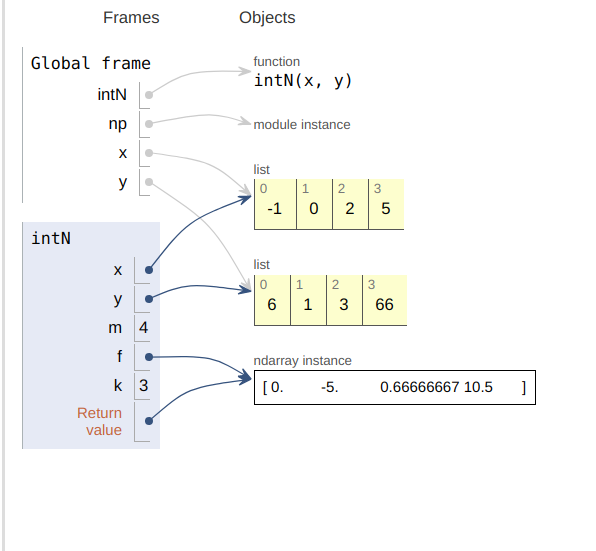

In [11]:

def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
       
        p=p*np.array((np.array(t)-x[k]))+y[k]
        
        
    return p

In [12]:

x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];

f=intNval(x,y,t)
print(f)

[   7. -118.   27.  838.]


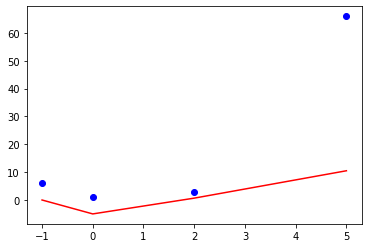

In [13]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
plt.plot(x,f,'r',x,y,'ob')
plt.show()

In [14]:

x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
p=intNval(x,y,t);
print(p[0])

7.0


> # <center>Conclusion general:</center>
__________
Franchement, l'interpolation de Lagrange n'est surtout utile que pour la théorie. En fait, le calcul avec cela nécessite un nombre énorme et des annulations catastrophiques. En arithmétique à virgule flottante, c'est très mauvais. Elle présente quelques petits avantages: par exemple, l'approche de Lagrange revient à diagonaliser le problème de la recherche des coefficients, il ne faut donc qu'un temps linéaire pour trouver les coefficients. C'est bien si vous devez utiliser le même ensemble de points à plusieurs reprises. Mais tous ces avantages ne compensent pas les problèmes associés à l’évaluation réelle d’un polynôme interpolant de Lagrange.

Avec l'interpolation de Newton, vous obtenez les coefficients assez rapidement (temps quadratique), l'évaluation est beaucoup plus stable (grosso modo car il y a généralement un seul terme dominant pour un 𝑥 donné), l'évaluation peut être faite rapidement et simplement en utilisant la méthode de Horner, et ajouter un nœud supplémentaire revient simplement à ajouter un seul terme supplémentaire. Il est également assez facile de voir comment interpoler des dérivés en utilisant le framework Newton.